In [1]:
# src/data_preprocessing.py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
wq = pd.read_csv('wine-quality-white-and-red.csv')


In [3]:
wq.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
wq.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [6]:
wq.isnull()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,False,False,False,False,False,False,False,False,False,False,False,False,False
6493,False,False,False,False,False,False,False,False,False,False,False,False,False
6494,False,False,False,False,False,False,False,False,False,False,False,False,False
6495,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
wq.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
wq.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [9]:
wq.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [10]:
wq['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [11]:
wq=wq[['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar',   'density', 'pH', 'alcohol','quality']]

In [12]:
wq.isnull().sum()

type                0
fixed acidity       0
volatile acidity    0
citric acid         0
residual sugar      0
density             0
pH                  0
alcohol             0
quality             0
dtype: int64

In [13]:
x=wq[['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar',   'density', 'pH', 'alcohol']]
y=wq['quality']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5197, 8), (1300, 8), (5197,), (1300,))

In [16]:
wq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              6497 non-null   object 
 1   fixed acidity     6497 non-null   float64
 2   volatile acidity  6497 non-null   float64
 3   citric acid       6497 non-null   float64
 4   residual sugar    6497 non-null   float64
 5   density           6497 non-null   float64
 6   pH                6497 non-null   float64
 7   alcohol           6497 non-null   float64
 8   quality           6497 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 456.9+ KB


In [17]:
type_encoder = LabelEncoder()
type_encoder.fit(pd.DataFrame(x_train['type']))

C:\Users\gungu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [18]:
x_train['type'] = type_encoder.transform(x_train['type'])

In [19]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5197 entries, 1916 to 860
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              5197 non-null   int64  
 1   fixed acidity     5197 non-null   float64
 2   volatile acidity  5197 non-null   float64
 3   citric acid       5197 non-null   float64
 4   residual sugar    5197 non-null   float64
 5   density           5197 non-null   float64
 6   pH                5197 non-null   float64
 7   alcohol           5197 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 365.4 KB


<Axes: >

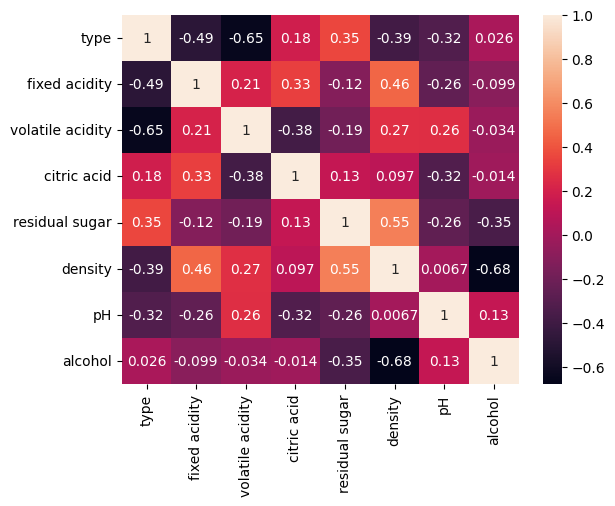

In [20]:
#checking of the correlation of the features
sns.heatmap(x_train.corr() , annot=True)

In [21]:
del x_train['fixed acidity']

In [22]:
x_train.columns

Index(['type', 'volatile acidity', 'citric acid', 'residual sugar', 'density',
       'pH', 'alcohol'],
      dtype='object')

<Axes: >

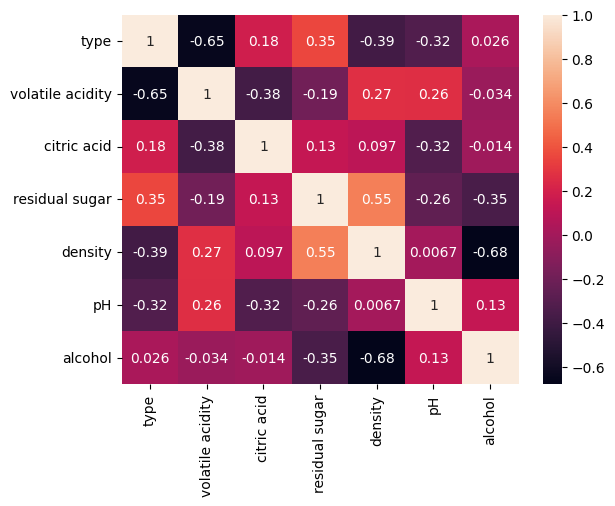

In [23]:
sns.heatmap(x_train.corr() , annot=True)

In [24]:
x_train_original = x_train.copy()
x_train = x_train.values
y_train = y_train.values

In [25]:
log_reg = LogisticRegression()

In [26]:
x_train_original.columns

Index(['type', 'volatile acidity', 'citric acid', 'residual sugar', 'density',
       'pH', 'alcohol'],
      dtype='object')

In [27]:
log_reg = LogisticRegression()

In [28]:
log_reg.fit(x_train , y_train)

C:\Users\gungu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

###### Make scaling and transform of X_test data

In [30]:
x_test.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,density,pH,alcohol
3103,white,7.0,0.25,0.45,2.3,0.99064,3.16,11.9
1419,white,7.6,0.14,0.74,1.6,0.99160,3.07,10.8
